In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 7)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv("hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
# lokum gibi data(cicek gibi)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.000,51.609,11.287,18.000,43.000,51.000,60.000,90.000
physical_score,5000.000,32.760,8.170,-0.000,26.700,35.300,38.900,50.000
test_result,5000.000,0.600,0.490,0.000,0.000,1.000,1.000,1.000


In [7]:
df["test_result"].value_counts() # Data Balance mi Unbalance mi?

1    3000
0    2000
Name: test_result, dtype: int64

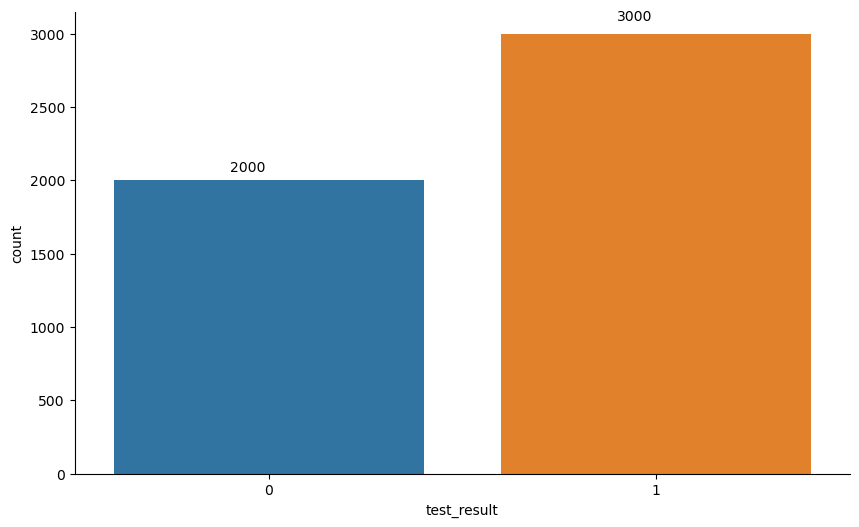

In [8]:
ax = sns.countplot(df['test_result'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

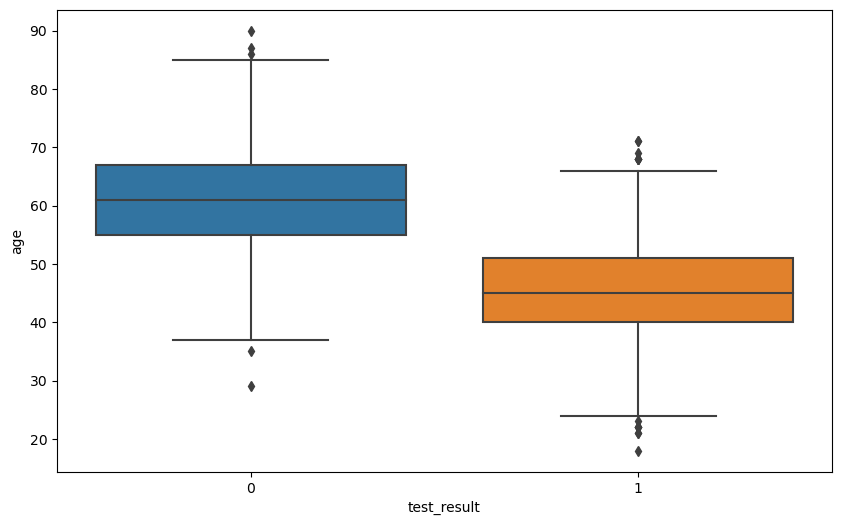

In [9]:
sns.boxplot(x='test_result', y= "age", data=df);

In [10]:
print(sns.__version__) 
# !pip install seaborn==0.11.2
# import seaborn as sns

0.11.2


In [11]:
# !pip install pandas==1.4.3

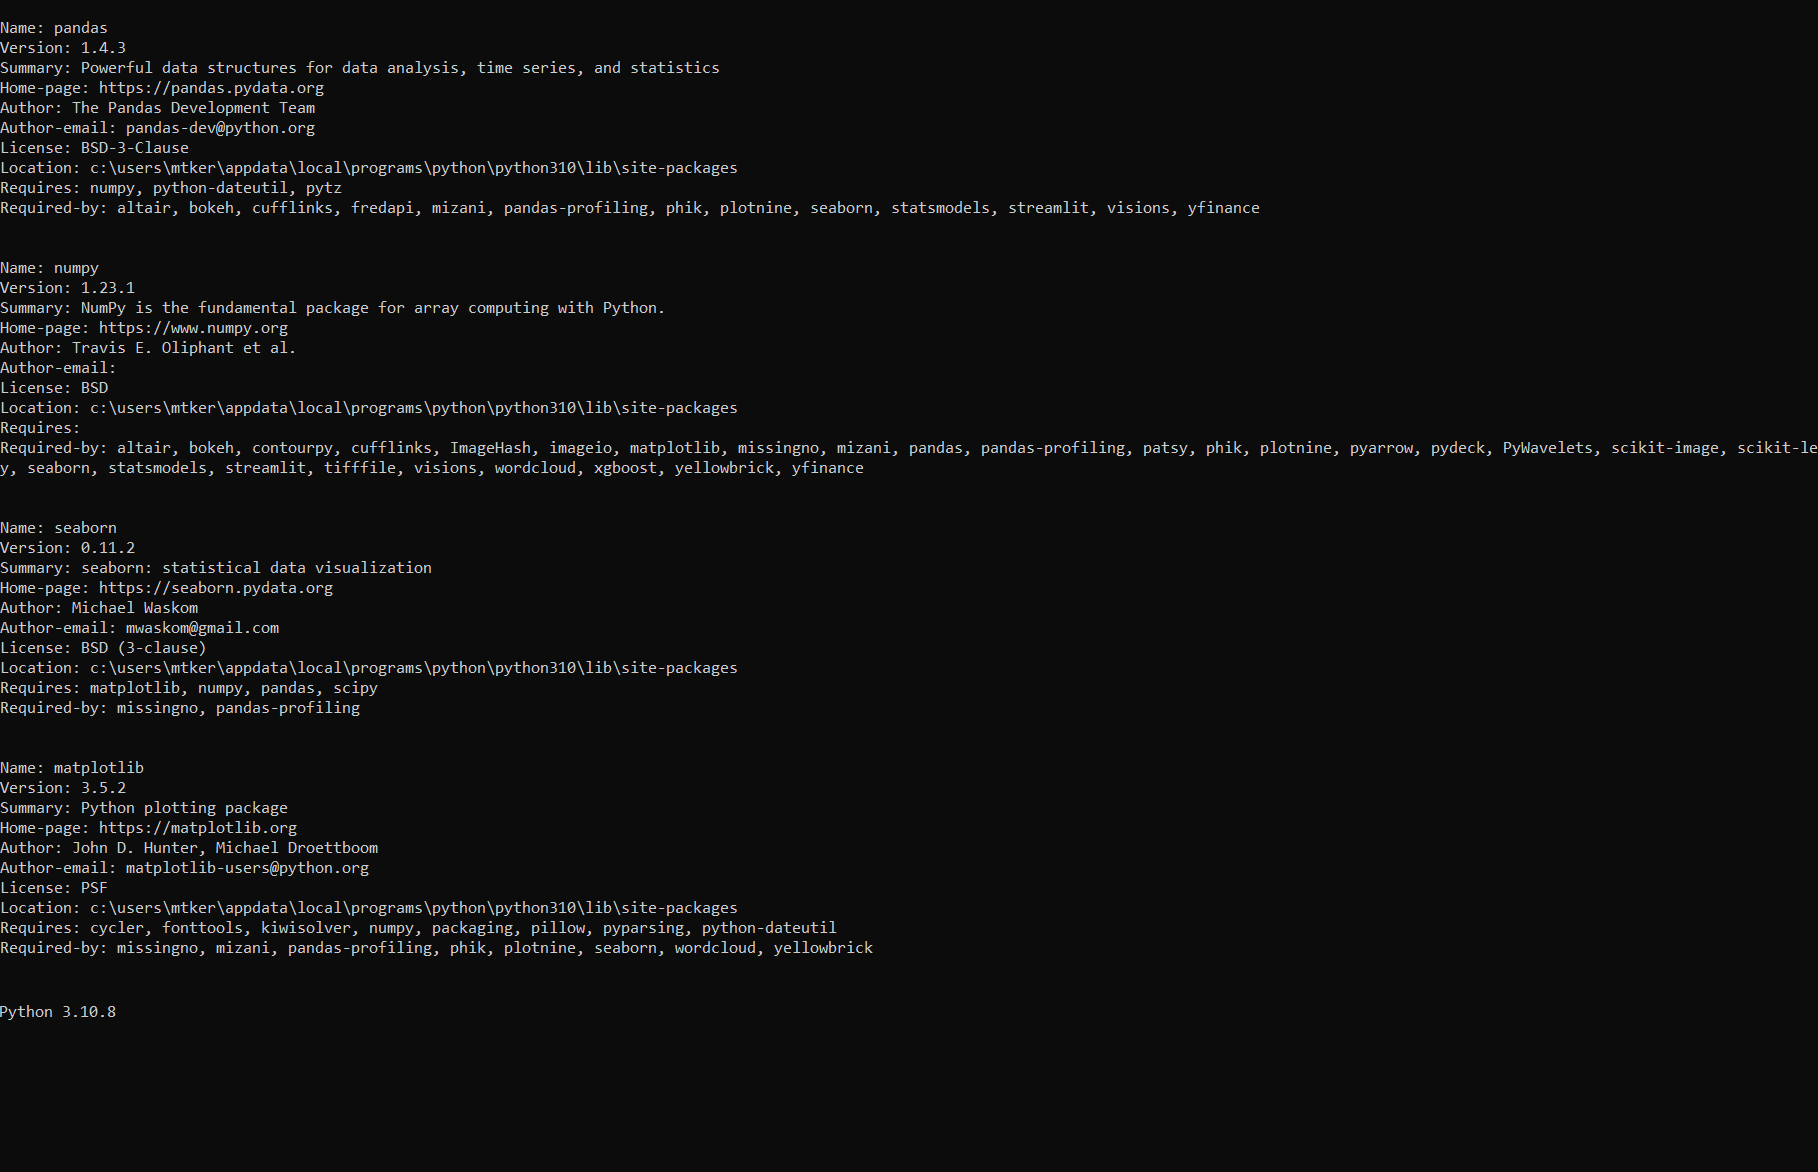

In [12]:
# !pip install numpy==1.23.1

In [13]:
print(np.__version__)

1.21.5


In [14]:
print(pd.__version__)

1.4.4


In [15]:
!pip install numpy==1.23.1


[notice] A new release of pip available: 22.2.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


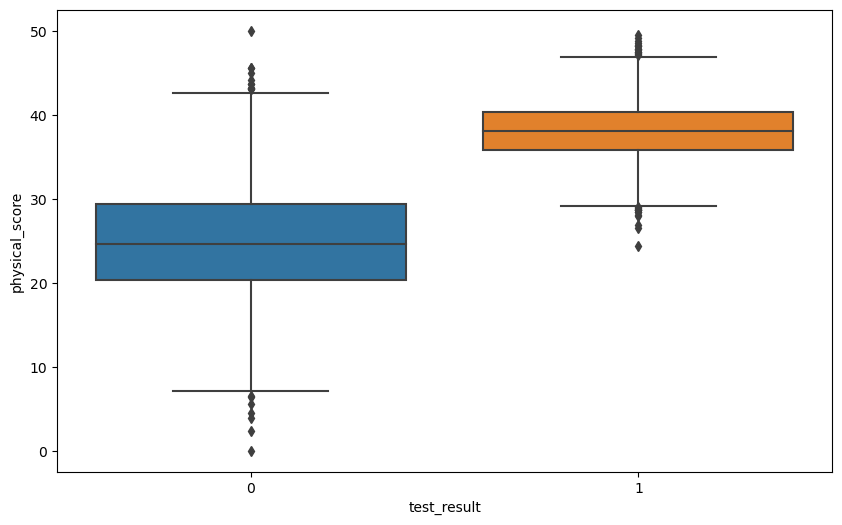

In [16]:
sns.boxplot(x='test_result', y='physical_score', data=df);

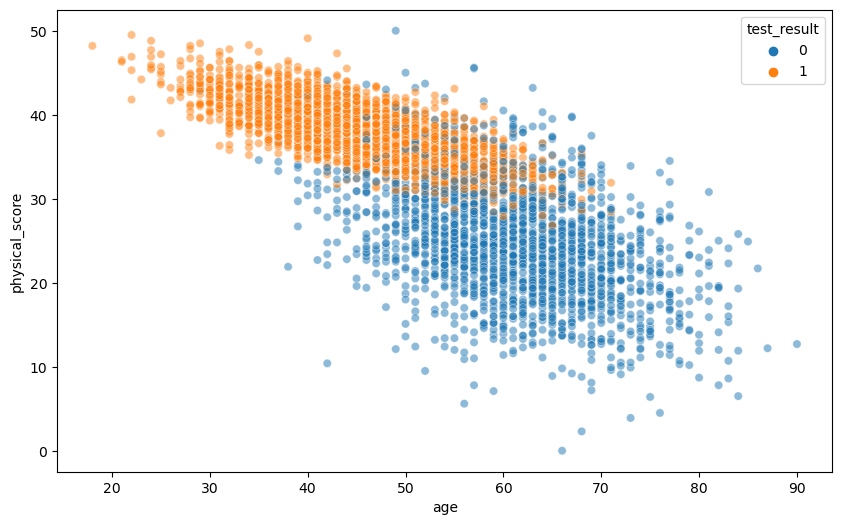

In [17]:
sns.scatterplot(x="age", y="physical_score", data = df, hue = "test_result", alpha = 0.5); ## hue paramtresine her zaman taget ver

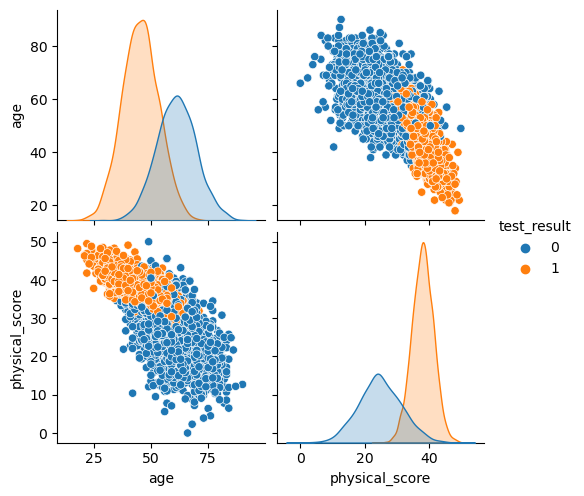

In [18]:
sns.pairplot(df, hue= "test_result");

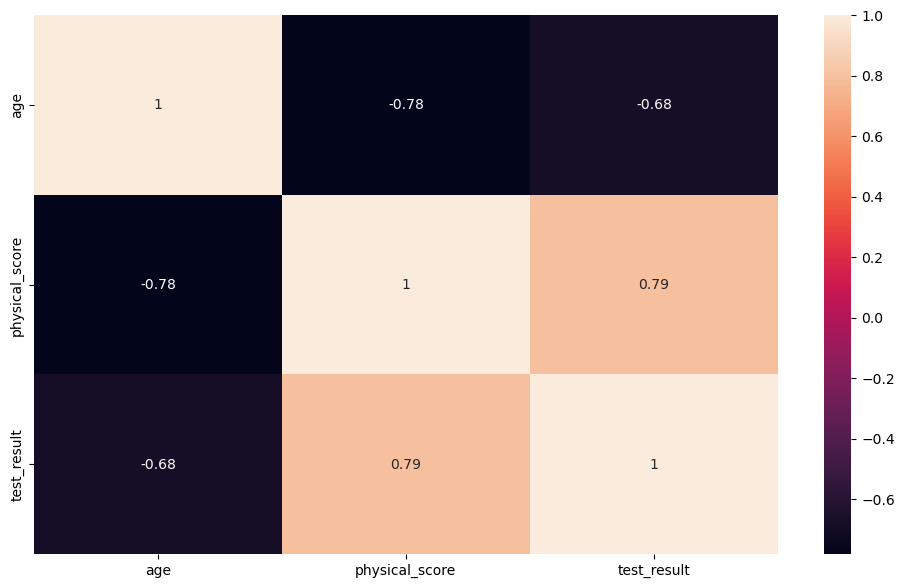

In [21]:
sns.heatmap(df.corr(), annot= True);

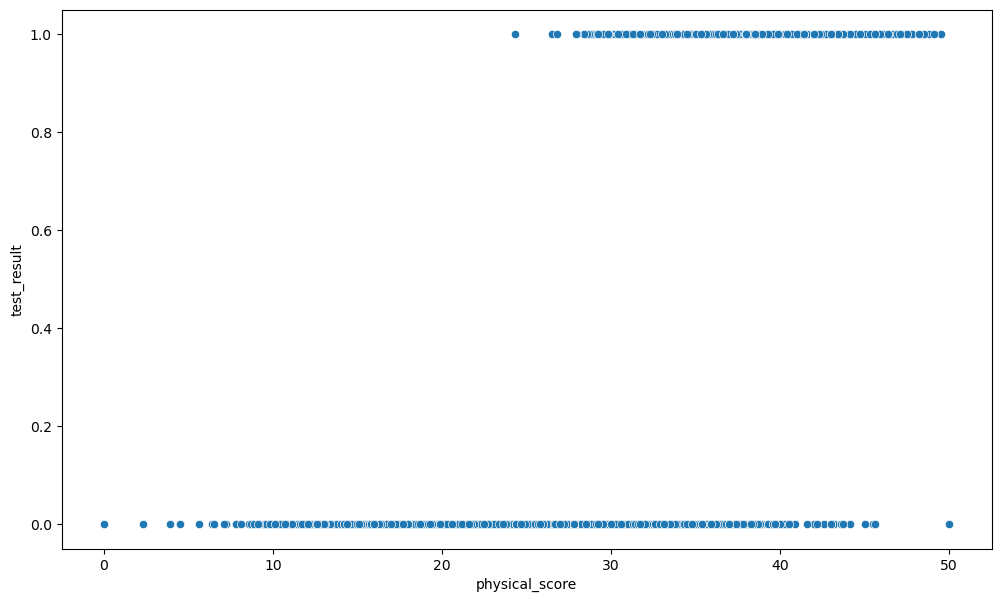

In [22]:
sns.scatterplot(x='physical_score',y='test_result',data=df);

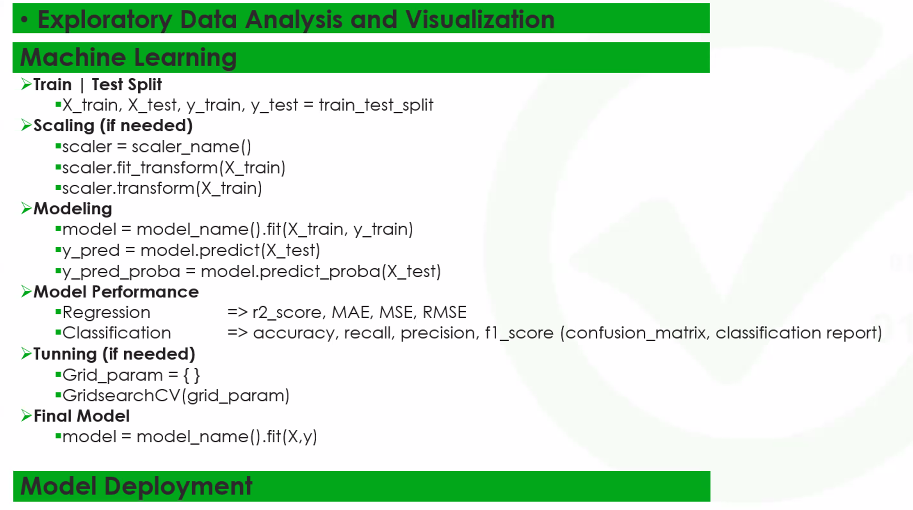

# Train | Test Split and Scaling

In [23]:
X = df.drop("test_result", axis = 1)
y = df["test_result"]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
# test size == > amacımız train setine eğitim için maximum veri sağlamak olmalı.  ben %20  ile gittim hoca %10 ile

# Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
X_train_scaled = scaler.fit_transform(X_train) #scale fit işlemini sadece X_train uygulanır
X_test_scaled = scaler.transform(X_test)

# Modeling

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log_model = LogisticRegression()

In [33]:
log_model.fit(X_train_scaled, y_train) 

LogisticRegression()

In [34]:
log_model.coef_  # Normalde bakmayacaz sadece ilk defa oldugundan bakiyoruz

array([[-0.903313  ,  3.48541689]])

In [35]:
log_model.intercept_

array([0.47858594])

In [36]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [38]:
y_pred_proba = log_model.predict_proba(X_test_scaled) # Olasilik hesaplarini gormek icin kullanilan code
y_pred_proba  # ilk derse ozel sonradan buna bakmayacagiz

array([[0.02440335, 0.97559665],
       [0.02676148, 0.97323852],
       [0.98932428, 0.01067572],
       ...,
       [0.0240031 , 0.9759969 ],
       [0.94898369, 0.05101631],
       [0.22360865, 0.77639135]])

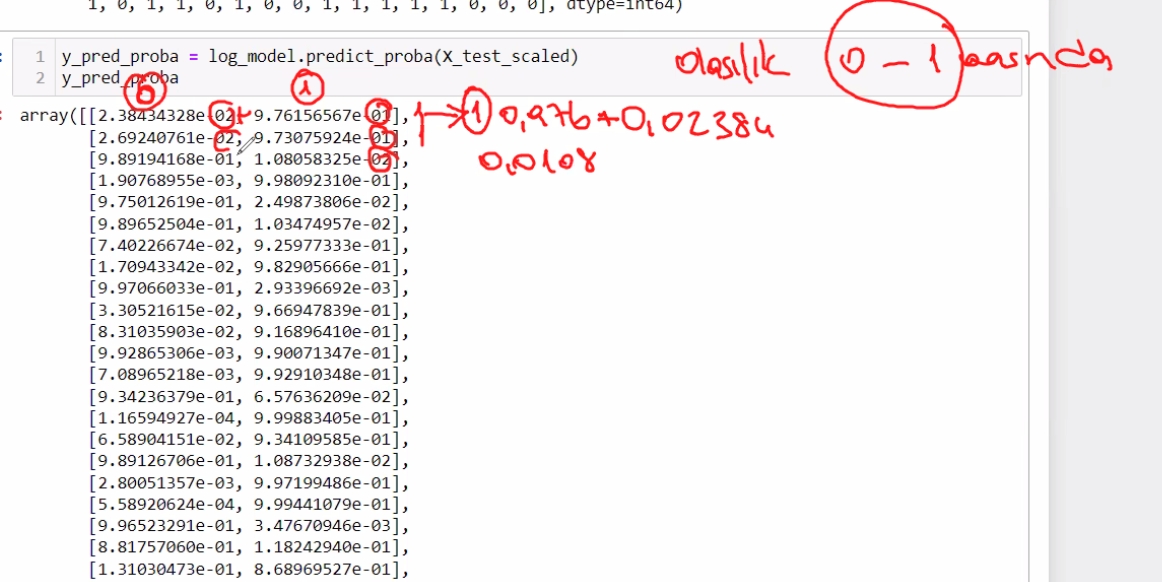
%10 icin

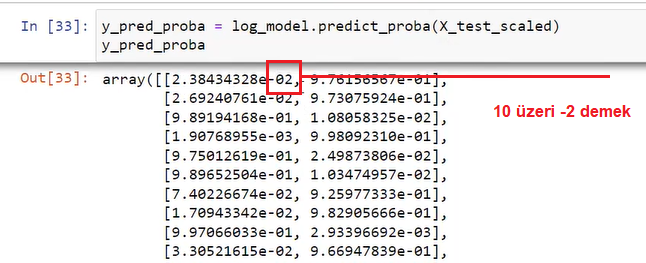

In [39]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data

,age,physical_score,test_result
1718,39.000,37.800,1
2511,45.000,38.700,1
345,56.000,21.800,0
2521,40.000,44.000,1
54,64.000,25.400,0
...,...,...,...
3900,71.000,23.300,0
3753,51.000,32.600,1
3582,42.000,38.400,1
2392,52.000,24.800,0


In [40]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,physical_score,test_result,pred_proba
1718,39.000,37.800,1,0.976
2511,45.000,38.700,1,0.973
345,56.000,21.800,0,0.011
2521,40.000,44.000,1,0.998
54,64.000,25.400,0,0.026
...,...,...,...,...
3900,71.000,23.300,0,0.006
3753,51.000,32.600,1,0.622
3582,42.000,38.400,1,0.976
2392,52.000,24.800,0,0.051


In [41]:
test_data["pred"] = y_pred
test_data

,age,physical_score,test_result,pred_proba,pred
1718,39.000,37.800,1,0.976,1
2511,45.000,38.700,1,0.973,1
345,56.000,21.800,0,0.011,0
2521,40.000,44.000,1,0.998,1
54,64.000,25.400,0,0.026,0
...,...,...,...,...,...
3900,71.000,23.300,0,0.006,0
3753,51.000,32.600,1,0.622,1
3582,42.000,38.400,1,0.976,1
2392,52.000,24.800,0,0.051,0


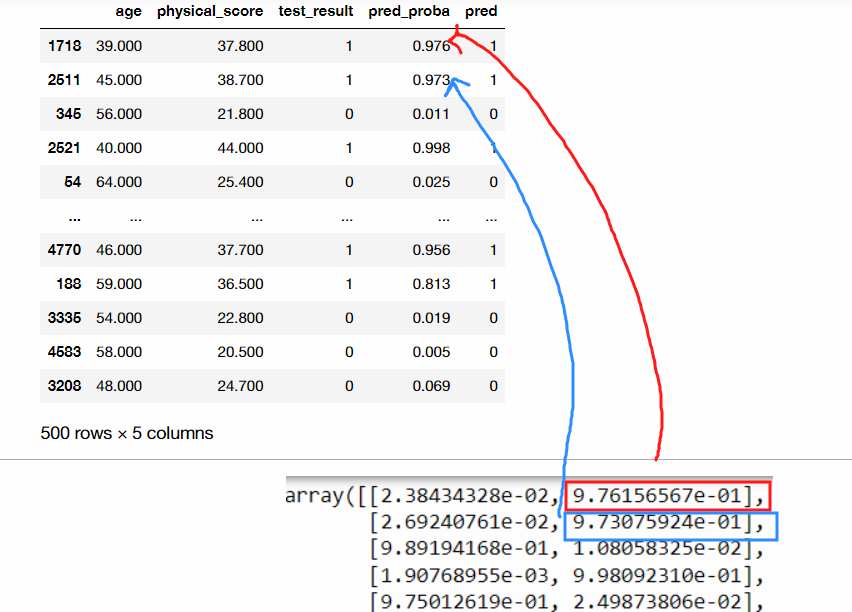

In [43]:
test_data.sample(20)

,age,physical_score,test_result,pred_proba,pred
3370,39.000,38.100,1,0.978,1
4664,55.000,31.400,0,0.417,0
163,53.000,34.400,1,0.752,1
928,28.000,41.000,1,0.997,1
3307,43.000,40.900,1,0.991,1
206,61.000,24.000,0,0.018,0
3926,34.000,43.600,1,0.999,1
4815,41.000,36.900,1,0.959,1
4953,46.000,36.200,1,0.920,1
3198,62.000,16.200,0,0.001,0


adem hoca
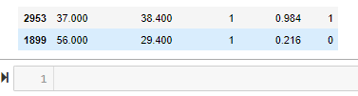

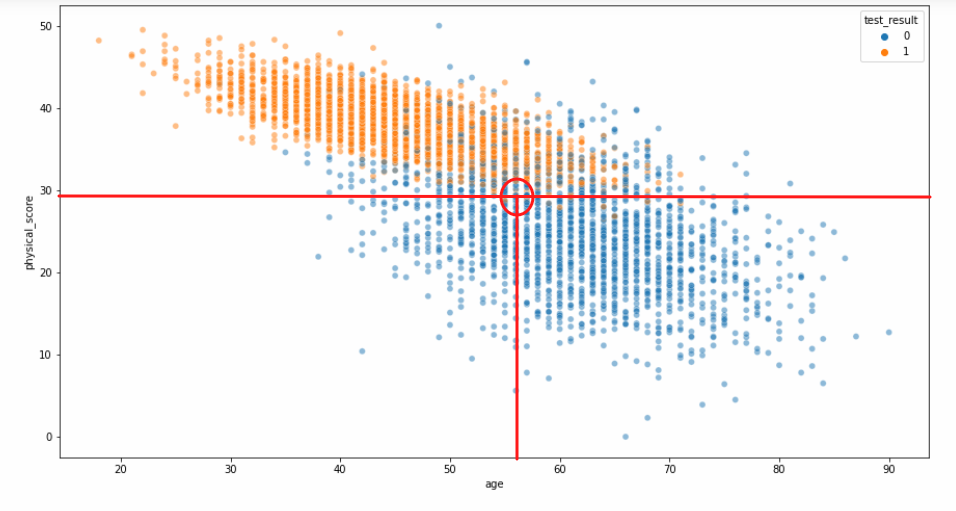


   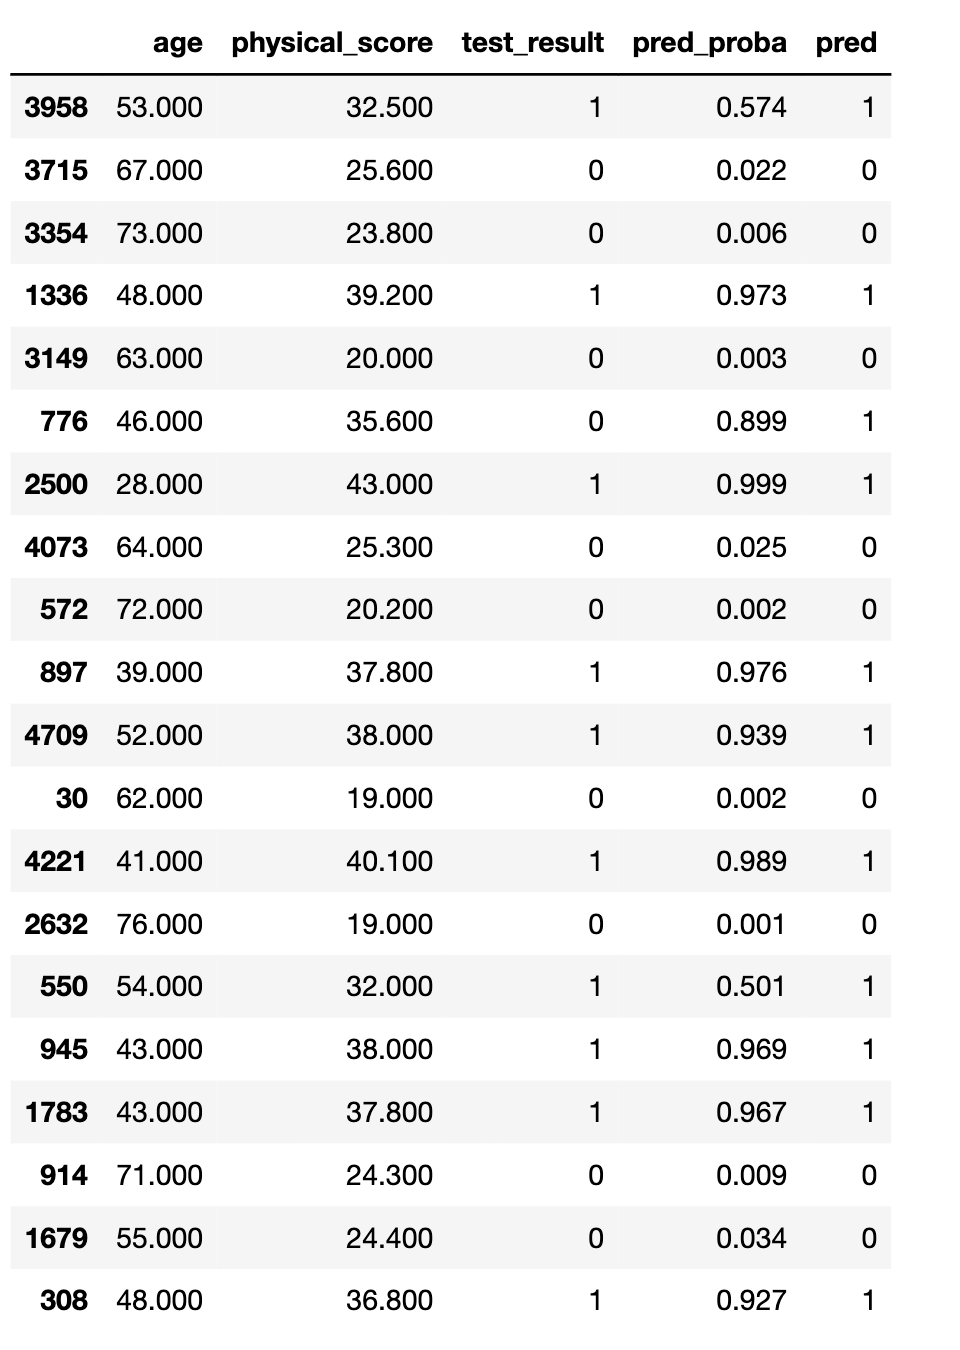 

In [44]:
test_data[((test_data["test_result"]==1) & (test_data["pred"]==0)) | ((test_data["test_result"]==0) & (test_data["pred"]==1)) ]

# tüm hatalar için

,age,physical_score,test_result,pred_proba,pred
2371,46.000,36.400,0,0.926,1
618,63.000,33.400,1,0.470,0
2145,65.000,35.200,0,0.621,1
3200,60.000,32.900,1,0.477,0
1726,46.000,36.700,0,0.934,1
...,...,...,...,...,...
2420,60.000,32.500,1,0.434,0
3917,48.000,33.400,0,0.747,1
2452,61.000,33.600,0,0.532,1
1845,50.000,31.900,0,0.569,1


In [46]:
test_data.sample(20)

,age,physical_score,test_result,pred_proba,pred
1240,54.000,38.200,1,0.935,1
1867,42.000,37.200,1,0.960,1
2375,38.000,40.000,1,0.991,1
1102,38.000,38.500,1,0.983,1
341,75.000,14.800,0,0.000,0
4148,60.000,36.900,1,0.835,1
3651,51.000,36.400,1,0.894,1
2143,49.000,28.900,0,0.284,0
4673,70.000,18.900,0,0.001,0
2036,49.000,37.900,1,0.949,1


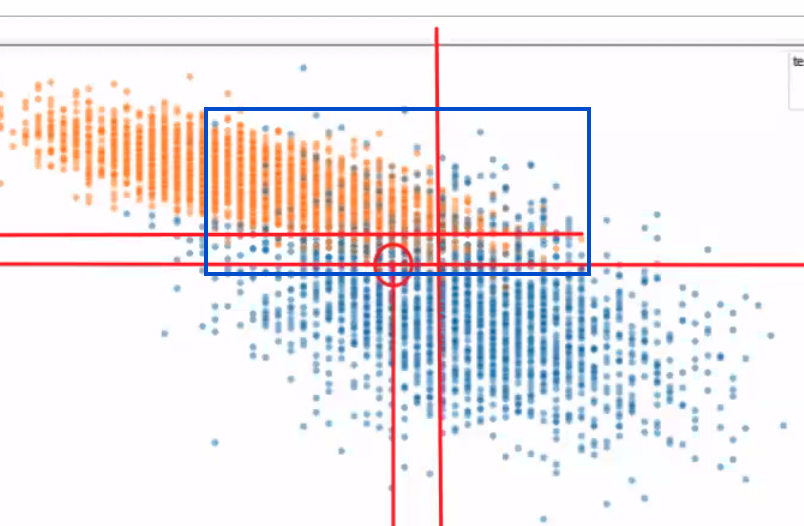

# Model Performance on Classification Tasks

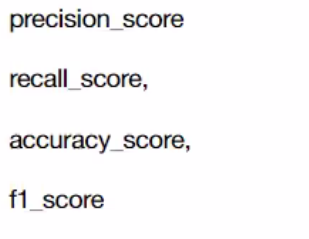

In [47]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

## Doğruluk (Accuracy)

Doğruluk (Accuracy): Modelin doğru tahmin ettiği örneklerin oranıdır. Doğruluğun maksimum değeri 1 olabilir. Örneğin, 100 örneğin 80'inin doğru sınıflandırıldığı bir modelin doğruluk skoru 0.8 olacaktır. Aşağıdaki formülden de anlaşılacağı üzere doğruluk doğru bilinen tahminlerin tüm tahminlere oranı olarak ifade edilebilir.

In [48]:
accuracy_score(y_test, y_pred)

0.917

In [49]:
log_model.score(X_test_scaled, y_test) # log_model içine x ve y testleri alır. accuracy_score ile aynı değerleri verir.

0.917

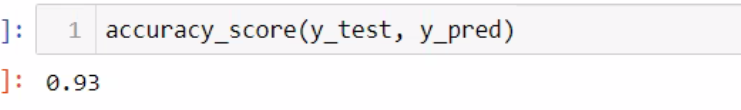

%10

https://medium.com/academy-team/makine-%C3%B6%C4%9Frenmesi-s%C4%B1n%C4%B1fland%C4%B1rma-modelleri-accuracy-precission-recall-f1-score-log-loss-and-e2c37fbcf285

#  Precision (Hassasiyet)

Hassasiyet (Precision): Pozitif olarak sınıflandırılan örneklerin ne kadarının gerçekten pozitif olduğunu gösterir. Hassasiyet modelin pozitif sınıfı doğru sınıflandırma yeteneğini ölçmektedir. Hassasiyet skoru, yanlış pozitif sınıflandırmaların sayısını (yanlış pozitifler) gerçek pozitif sınıflandırmaların sayısına (doğru pozitifler) oranlaması ile hesaplanmaktadır. Aşağıdaki formülden de anlaşılacağı üzere hassasiyet pozitif olarak doğru bilinen tahminlerin tüm pozitif tahminlere oranı olarak ifade edilebilir.

In [50]:
precision_score(y_test, y_pred) #default post_lable= 1 dir 1 klasının score verir.

0.9126365054602185

# Recall